# Valetudo - Projeto Jupiter - 2019
Valetudo launch from Projeto Jupiter (University of São Paulo, Brazil).
Permission to use flight data given by Guilherme Fernandes, 2020


In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
# Importing libraries
import matplotlib.pyplot as plt

from rocketpy import Environment, Flight, Rocket, SolidMotor

In [32]:
plt.style.use("seaborn-v0_8-dark-palette")

## RocketPy Simulation


Define a dictionary with the inputs for the simulation


In [33]:
parameters = {
    # Mass Details
    "rocket_mass": (8.257, 0.001),
    # Propulsion Details
    "impulse": (1415.15, 35.3),
    "burn_time": (5.274, 1),
    "nozzle_radius": (21.642 / 1000, 0.5 / 1000),
    "throat_radius": (8 / 1000, 0.5 / 1000),
    "grain_separation": (6 / 1000, 1 / 1000),
    "grain_density": (1707, 50),
    "grain_outer_radius": (21.4 / 1000, 0.375 / 1000),
    "grain_initial_inner_radius": (9.65 / 1000, 0.375 / 1000),
    "grain_initial_height": (120 / 1000, 1 / 1000),
    # Aerodynamic Details
    "inertia_I": (3.675, 0.03675),
    "inertia_Z": (0.007, 0.00007),
    "radius": (40.45 / 1000, 0.001),
    "distance_rocket_nozzle": (-1.024, 0.001),
    "distance_rocket_propellant": (-0.571, 0.001),
    "power_off_drag": (0.9081 / 1.05, 0.033),
    "power_on_drag": (0.9081 / 1.05, 0.033),
    "nose_length": (0.274, 0.001),
    "nose_distance_to_cm": (1.134, 0.001),
    "fin_span": (0.077, 0.0005),
    "fin_root_chord": (0.058, 0.0005),
    "fin_tip_chord": (0.018, 0.0005),
    "fin_distance_to_cm": (-0.906, 0.001),
    # Launch and Environment Details
    "wind_direction": (0, 2),
    "wind_speed": (1, 0.033),
    "inclination": (84.7, 1),
    "heading": (53, 2),
    "rail_length": (5.7, 0.0005),
    # Parachute Details
    "cd_s_drogue": (0.349 * 1.3, 0.07),
    "lag_rec": (1, 0.5),
    # Electronic Systems Details
    "lag_se": (0.73, 0.16),
}

### Environment


Define the `Environment` object


In [34]:
# Environment conditions
env = Environment(
    date=(2019, 8, 10, 21),
    latitude=-23.363611,
    longitude=-48.011389,
    elevation=668,
)

# env.set_atmospheric_model(
#     type="Reanalysis",
#     file="../../data/weather/LASC2019_TATUI_reanalysis_ensemble.nc",
#     dictionary="ECMWF",
# )

Visualize the `Environment` object



Gravity Details

Acceleration of gravity at surface level:    9.7864 m/s²
Acceleration of gravity at  80.000 km (ASL): 9.5461 m/s²


Launch Site Details

Launch Date: 2019-08-10 21:00:00 UTC
Launch Site Latitude: -23.36361°
Launch Site Longitude: -48.01139°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 192123.24 W    7413017.14 S
Launch Site UTM zone: 23K
Launch Site Surface Elevation: 668.0 m


Atmospheric Model Details

Atmospheric Model Type: standard_atmosphere
standard_atmosphere Maximum Height: 80.000 km

Surface Atmospheric Conditions

Surface Wind Speed: 0.00 m/s
Surface Wind Direction: 0.00°
Surface Wind Heading: 0.00°
Surface Pressure: 935.66 hPa
Surface Temperature: 283.82 K
Surface Air Density: 1.148 kg/m³
Surface Speed of Sound: 337.55 m/s


Earth Model Details

Earth Radius at Launch site: 6374.80 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034


Atmospheric Model Plots



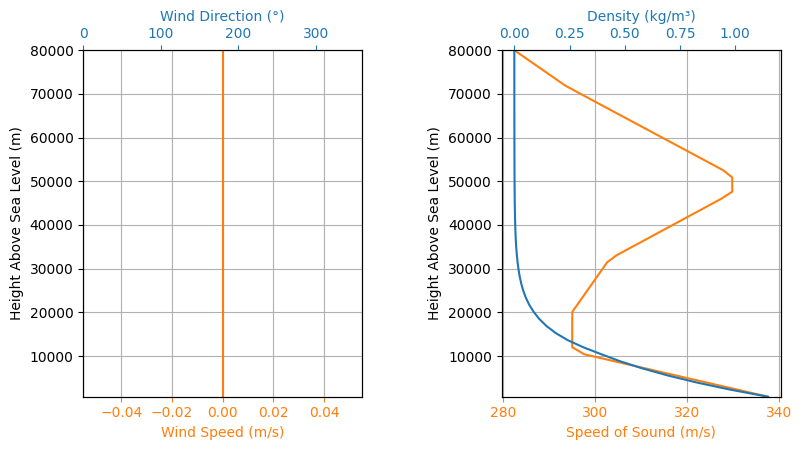

In [35]:
env.info()

### Motor


Define the `SolidMotor` object


In [36]:
keron = SolidMotor(
    thrust_source="../../data/motors/projeto-jupiter/keron_thrust_curve.csv",
    burn_time=parameters.get("burn_time")[0],
    dry_mass=0.001,
    dry_inertia=(0, 0, 0),
    center_of_dry_mass_position=0.42,
    grains_center_of_mass_position=0.42,
    grain_number=6,
    grain_separation=parameters.get("grain_separation")[0],
    grain_density=parameters.get("grain_density")[0],
    grain_outer_radius=parameters.get("grain_outer_radius")[0],
    grain_initial_inner_radius=parameters.get("grain_initial_inner_radius")[0],
    grain_initial_height=parameters.get("grain_initial_height")[0],
    nozzle_radius=parameters.get("nozzle_radius")[0],
    throat_radius=parameters.get("throat_radius")[0],
    interpolation_method="linear",
    nozzle_position=0,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

Nozzle Details
Nozzle Radius: 0.021641999999999998 m
Nozzle Throat Radius: 0.008 m

Grain Details
Number of Grains: 6
Grain Spacing: 0.006 m
Grain Density: 1707 kg/m3
Grain Outer Radius: 0.0214 m
Grain Inner Radius: 0.00965 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.235 kg

Motor Details
Total Burning Time: 5.274 s
Total Propellant Mass: 1.409 kg
Average Propellant Exhaust Velocity: 1004.589 m/s
Average Thrust: 268.327 N
Maximum Thrust: 1068.36 N at 1.508 s after ignition.
Total Impulse: 1415.154 Ns



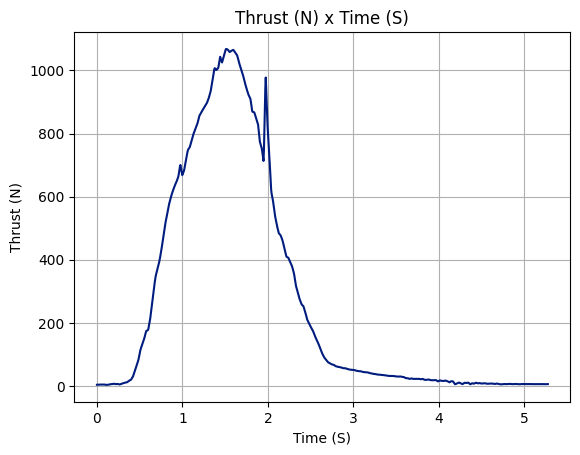

In [37]:
keron.info()

### Rocket


Create the `Rocket` object


In [38]:
valetudo = Rocket(
    radius=parameters.get("radius")[0],
    mass=parameters.get("rocket_mass")[0],
    inertia=(
        parameters.get("inertia_I")[0],
        parameters.get("inertia_I")[0],
        parameters.get("inertia_Z")[0],
    ),
    power_off_drag="../../data/rockets/valetudo/Cd_PowerOff_RASAero.csv",
    power_on_drag="../../data/rockets/valetudo/Cd_PowerOn_RASAero.csv",
    center_of_mass_without_motor=0,
)
valetudo.set_rail_buttons(0.224, -0.93, 30)
valetudo.add_motor(motor=keron, position=parameters.get("distance_rocket_nozzle")[0])

Adding aerodynamic surfaces


In [39]:
nose_cone = valetudo.add_nose(
    length=parameters.get("nose_length")[0],
    kind="tangent",
    position=parameters.get("nose_distance_to_cm")[0],
)
fin_set = valetudo.add_trapezoidal_fins(
    3,
    span=parameters.get("fin_span")[0],
    root_chord=parameters.get("fin_root_chord")[0],
    tip_chord=parameters.get("fin_tip_chord")[0],
    position=parameters.get("fin_distance_to_cm")[0],
)

Adding Parachute


In [40]:
drogue = valetudo.add_parachute(
    "Drogue",
    cd_s=parameters.get("cd_s_drogue")[0],
    trigger="apogee",
    sampling_rate=105,
    lag=parameters.get("lag_rec")[0],
    noise=(0, 8.3, 0.5),
)

Modify the Drag Coefficient curve


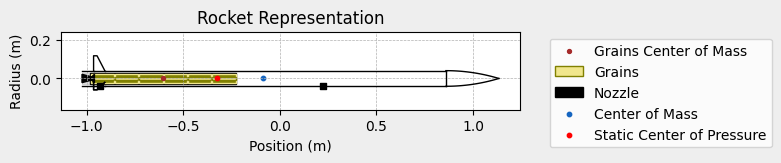

In [41]:
valetudo.draw()

In [42]:
valetudo.info()


Inertia Details

Rocket Mass: 8.257 kg (without motor)
Rocket Dry Mass: 8.258 kg (with unloaded motor)
Rocket Loaded Mass: 9.667 kg
Rocket Inertia (with unloaded motor) 11: 3.675 kg*m2
Rocket Inertia (with unloaded motor) 22: 3.675 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.007 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.04045 m
Rocket Frontal Area: 0.005140 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.000 m
Rocket Center of Dry Mass - Nozzle Exit: 1.024 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.604 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.088 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 4.402/rad

Center of Pressure

Nose Cone Center of Pressure position: 1.

### Flight


In [43]:
test_flight = Flight(
    rocket=valetudo,
    environment=env,
    rail_length=parameters.get("rail_length")[0],
    inclination=parameters.get("inclination")[0],
    heading=parameters.get("heading")[0],
)


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 668.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.979 | e1: -0.035 | e2: 0.031 | e3: -0.199
Euler Angles - Spin φ : 30.00° | Nutation θ: -5.30° | Precession ψ: -53.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 2.951 c


Surface Wind Conditions

Frontal Surface Wind Speed: 0.00 m/s
Lateral Surface Wind Speed: 0.00 m/s


Launch Rail

Launch Rail Length: 5.7 m
Launch Rail Inclination: 84.70°
Launch Rail Heading: 53.00°


Rail Departure State

Rail Departure Time: 1.084 s
Rail Departure Velocity: 22.603 m/s
Rail Departure Stability Margin: 3.146 c
Rail Departure Angle of Attack: -0.000°
Rail Departure Thrust-Weight Ratio: 8.214
Rail Departure Reynolds Number: 1.188e+05


Burn out State

Burn out time: 5.274 s
Altitude at burn out: 1095.599 m (ASL) | 427.599 m (AGL)
Rocket speed at burn out: 94.412 m/s
Freestream vel

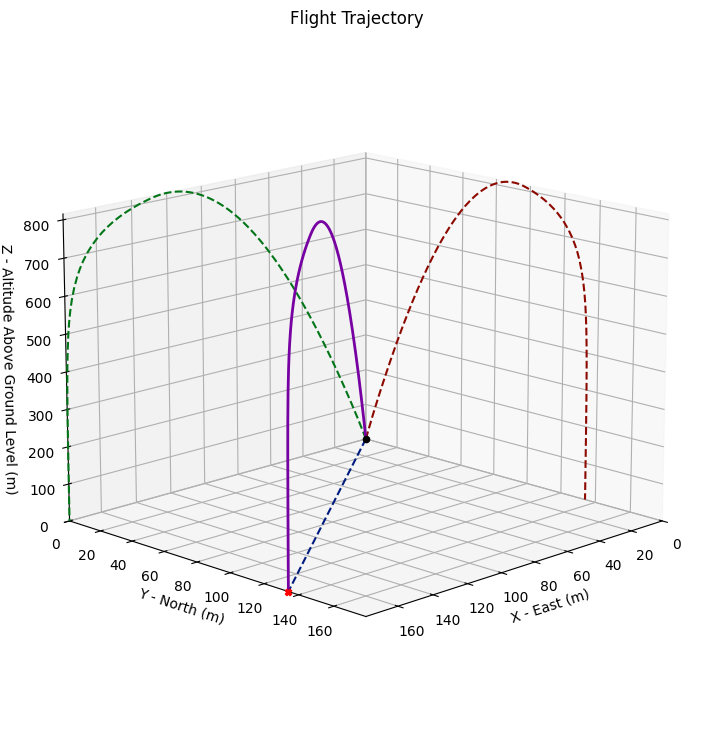

In [44]:
test_flight.info()
test_flight.plots.trajectory_3d()

## Comparison with the real flight data


In [45]:
# The flight recordings were lost after the launch. Only three useful information were recovered:
# - The apogee altitude (AGL): 860 m
# - East/West drift: 350 m
# - North/South drift: 25 m
# - Total drift: 350.9 m

In [46]:
actual_data = {
    "apogee": 860,
    "east_west_drift": 350,
    "north_south_drift": 25,
    "total_drift": 350.9,
}

In [47]:
simulated = {
    "apogee": test_flight.apogee - test_flight.env.elevation,
    "east_west_drift": test_flight.x(test_flight.t_final),
    "north_south_drift": test_flight.y(test_flight.t_final),
    "total_drift": test_flight.drift(test_flight.t_final),
}

In [48]:
apogee_actual = actual_data.get("apogee")
apogee_simulated = simulated.get("apogee")
apogee_error = abs(apogee_actual - apogee_simulated)
apogee_percentage_error = apogee_error / apogee_actual * 100

print("Apogee (AGL): ")
print(f"Actual: {apogee_actual:.2f} m")
print(f"Simulated: {apogee_simulated:.2f} m")
print(f"Error: {apogee_error:.2f} m")
print(f"Percentage Error: {apogee_percentage_error:.2f}%")

Apogee (AGL): 
Actual: 860.00 m
Simulated: 815.26 m
Error: 44.74 m
Percentage Error: 5.20%


In [49]:
drift_actual = actual_data.get("total_drift")
drift_simulated = simulated.get("total_drift")
drift_error = abs(drift_actual - drift_simulated)
drift_percentage_error = drift_error / drift_actual * 100

# print("Drift")
# print(f"Actual: {drift_actual:.2f} m")
# print(f"Simulated: {drift_simulated:.2f} m")
# print(f"Error: {drift_error:.2f} m")
# print(f"Percentage Error: {drift_percentage_error:.2f}%")